<a href="https://colab.research.google.com/github/soundaryahiremath1997-beep/spam/blob/main/GenAI_DEC_2025_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generative Models

In [1]:
#del llm
import torch, gc
gc.collect()
torch.cuda.empty_cache()


In [2]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

#Text Generation - Large Language Model

In [3]:
%%capture
!pip install transformers>=4.41.2 accelerate>=0.31.0

#Hugging Face Models

In [4]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=False,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

# Create a pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=False,
    max_new_tokens=200,
    do_sample=False,
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=False,
)



In [ ]:
# Create a pipeline
generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=False,
    max_new_tokens=200,
    do_sample=False,
    temperature=0.3
)

In [ ]:
prompt = "The capital of France is"
print(pipe(prompt)[0]['generated_text'])


In [ ]:
prompt = "Write an email  requesting leave letter for attending Workshop."

output = pipe(prompt)

print(output[0]['generated_text'])

In [ ]:
print(generator("Create a funny joke about Chickens")[0]['generated_text'])

A prompt template is:

A reusable structure that defines how instructions are presented to the model.

Your template includes:

Roles (user, assistant)

Turn boundaries

Instruction placement





apply_chat_template() does

It converts your structured messages list

Into a single formatted text prompt

In the exact format expected by the underlying LLM

In [ ]:
messages = [
    {"role": "user", "content": "Create a funny joke about chickens."}
]

prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False)
print(prompt)

In [ ]:
output = pipe(messages)
print(output[0]["generated_text"])

In [ ]:
output = pipe(messages, do_sample=True, temperature=0.9,top_p=1)
print(output[0]["generated_text"])

### 1. `generator(messages)`

* You are passing the **structured chat messages** to the model
* Internally:

  * Messages → chat template → tokens
  * Tokens → model → generated tokens
* This triggers **LLM inference**, not training

You are asking:

> “Given this prompt, generate a response.”

---

### 2. `do_sample=True`

* Enables **probabilistic sampling**
* The model does **not always choose the highest-probability word**
* This allows **variety and creativity**

If `do_sample=False`:

* Output would be **deterministic**
* Same prompt → same output every time

---

### 3. `temperature=0.6`

Controls **how random the output is**.

| Temperature | Behavior                        |
| ----------- | ------------------------------- |
| 0.0–0.3     | Very deterministic              |
| **0.6**     | Balanced, controlled creativity |
| 1.0+        | Highly creative, risky          |

Your choice (0.6) is:

* Ideal for **humor**
* Still **coherent and safe**

---

### 4. `top_p=1`

This is **nucleus sampling**.

* `top_p=1` means:

  * Consider **all tokens**
* If you set:

  * `top_p=0.9` → only top 90% probability tokens

With `temperature=0.6` + `top_p=1`:

* Creativity is controlled mainly by **temperature**

---

## Output handling

```python
print(output[0]["generated_text"])
```

* The pipeline returns a **list**
* Each item contains:

  * The full **generated conversation**
* You extract and print the model’s text response

---

## Big picture: What are you doing?

You are performing **LLM text generation using a chat prompt with controlled randomness**.

More formally:

> You are invoking an **autoregressive language model** to generate a response from a chat-formatted prompt using **sampling-based decoding**.

---

## Training vs inference (important distinction)

| Aspect                     | What you’re doing |
| -------------------------- | ----------------- |
| Training                   | ❌ No              |
| Fine-tuning                | ❌ No              |
| Prompt templating          | ✅ Already done    |
| **Inference / Generation** | ✅ Yes             |

---

## Interview-ready one-line answer

> *I am performing inference by generating text from a chat-based prompt using sampling parameters like temperature and top-p to control creativity.*

---

## Why this is the correct approach

* Uses **chat-aware prompting**
* Uses **sampling instead of greedy decoding**
* Suitable for:

  * Conversational agents
  * Chatbots
  * Creative generation
  * Agent workflows

--


#Structured Prompting

In [ ]:
# Text to summarize which we stole from https://jalammar.github.io/illustrated-transformer/ ;)
text = """In the previous post, we looked at Attention – a ubiquitous method in modern deep learning models. Attention is a concept that helped improve the performance of neural machine translation applications. In this post, we will look at The Transformer – a model that uses attention to boost the speed with which these models can be trained. The Transformer outperforms the Google Neural Machine Translation model in specific tasks. The biggest benefit, however, comes from how The Transformer lends itself to parallelization. It is in fact Google Cloud’s recommendation to use The Transformer as a reference model to use their Cloud TPU offering. So let’s try to break the model apart and look at how it functions.
The Transformer was proposed in the paper Attention is All You Need. A TensorFlow implementation of it is available as a part of the Tensor2Tensor package. Harvard’s NLP group created a guide annotating the paper with PyTorch implementation. In this post, we will attempt to oversimplify things a bit and introduce the concepts one by one to hopefully make it easier to understand to people without in-depth knowledge of the subject matter.
Let’s begin by looking at the model as a single black box. In a machine translation application, it would take a sentence in one language, and output its translation in another.
Popping open that Optimus Prime goodness, we see an encoding component, a decoding component, and connections between them.
The encoding component is a stack of encoders (the paper stacks six of them on top of each other – there’s nothing magical about the number six, one can definitely experiment with other arrangements). The decoding component is a stack of decoders of the same number.
The encoders are all identical in structure (yet they do not share weights). Each one is broken down into two sub-layers:
The encoder’s inputs first flow through a self-attention layer – a layer that helps the encoder look at other words in the input sentence as it encodes a specific word. We’ll look closer at self-attention later in the post.
The outputs of the self-attention layer are fed to a feed-forward neural network. The exact same feed-forward network is independently applied to each position.
The decoder has both those layers, but between them is an attention layer that helps the decoder focus on relevant parts of the input sentence (similar what attention does in seq2seq models).
Now that we’ve seen the major components of the model, let’s start to look at the various vectors/tensors and how they flow between these components to turn the input of a trained model into an output.
As is the case in NLP applications in general, we begin by turning each input word into a vector using an embedding algorithm.
Each word is embedded into a vector of size 512. We'll represent those vectors with these simple boxes.
The embedding only happens in the bottom-most encoder. The abstraction that is common to all the encoders is that they receive a list of vectors each of the size 512 – In the bottom encoder that would be the word embeddings, but in other encoders, it would be the output of the encoder that’s directly below. The size of this list is hyperparameter we can set – basically it would be the length of the longest sentence in our training dataset.
After embedding the words in our input sequence, each of them flows through each of the two layers of the encoder.
Here we begin to see one key property of the Transformer, which is that the word in each position flows through its own path in the encoder. There are dependencies between these paths in the self-attention layer. The feed-forward layer does not have those dependencies, however, and thus the various paths can be executed in parallel while flowing through the feed-forward layer.
Next, we’ll switch up the example to a shorter sentence and we’ll look at what happens in each sub-layer of the encoder.
Now We’re Encoding!
As we’ve mentioned already, an encoder receives a list of vectors as input. It processes this list by passing these vectors into a ‘self-attention’ layer, then into a feed-forward neural network, then sends out the output upwards to the next encoder.
"""

# Prompt components
persona = "You are an expert in Large Language models. You excel at breaking down complex papers into digestible summaries.\n"
instruction = "Summarize the key findings of the paper provided.\n"
context = "Your summary should extract the most crucial points that can help researchers quickly understand the most vital information of the paper.\n"
data_format = "Create a bullet-point summary that outlines the method. Follow this up with a concise paragraph that encapsulates the main results.\n"
audience = "The summary is designed for busy researchers that quickly need to grasp the newest trends in Large Language Models.\n"
tone = "The tone should be professional and clear.\n"
text = "MY TEXT TO SUMMARIZE"  # Replace with your own text to summarize
data = f"Text to summarize: {text}"

# The full prompt - remove and add pieces to view its impact on the generated output
query = persona + instruction + context + data_format + audience + tone + data

In [ ]:
messages = [
    {"role": "user", "content": query}
]
print(tokenizer.apply_chat_template(messages, tokenize=False))

In [ ]:
# Generate the output
outputs = pipe(messages)
print(outputs[0]["generated_text"])

#Story Teller

In [ ]:
prompt = """
User:
You are a friendly and creative storyteller for children.

Task:
Create a funny joke about the Earth that kids can easily understand.

Guidelines:
- Use simple, kid-friendly language
- Keep the tone lighthearted and positive
- Limit the response to 2–3 sentences
- Include one clear punchline

Assistant:
"""

output = pipe(prompt)
print("Assistant:", output[0]["generated_text"])


In [ ]:
topic = input("Enter story topic: ")

prompt = f"""
You are a creative and engaging storyteller for children.

Write a short, enchanting story about "{topic}".

Rules:
- Simple, kid-friendly language
- Positive and magical tone
- 4–5 sentences
- Output only the story as a single paragraph

Story:
"""
output = pipe(prompt)

full_text = output[0]["generated_text"]

# Extract only the story paragraph
story = full_text.split("Story:")[-1].strip()

print(story)


In [ ]:
topic = input("Enter story topic: ")

STORY_PROMPT_TEMPLATE = """
You are a children’s storyteller.

Write a VERY SHORT complete story about "{topic}".



Constraints:
- Simple, child-friendly language
- Maximum 3 sentences
- Positive and engaging tone
- Clear beginning, middle, and end
- Include a moral at the end
- Output ONLY the story as a single paragraph
- Do NOT repeat the prompt or instructions


Story:
"""

prompt = STORY_PROMPT_TEMPLATE.format(topic=topic)

output = pipe(prompt)

full_text = output[0]["generated_text"]

# Extract only the story
story = full_text.split("Story:")[-1].strip()

print(story)



# Construct a Professional, reusable prompt template for International Business Marketing that takes the product name from the user and generates

(1) a global-ready title,

(2) a powerful slogan, and

(3) a product advertising description, written from the perspectives of three distinct Advertising Experts.


In [ ]:
product_name = input("Enter product name: ")

prompt = f"""
User:
You are an International Business Marketing AI powered by three world-class Advertising Experts.

Product Name:
"{product_name}"

Task:
For the given product, generate marketing content suitable for global markets.

Expert Perspectives:
1. Global Brand Strategist – focuses on international positioning, brand trust, and scalability.
2. Creative Advertising Director – focuses on emotional appeal, creativity, and memorability.
3. Performance Marketing Expert – focuses on value proposition, benefits, and conversion.

For EACH expert, generate:
A. A compelling global-ready product title
B. One powerful, memorable slogan
C. A concise product advertising description (3–4 lines)

Guidelines:
- Language must be professional, persuasive, and internationally appropriate
- Avoid region-specific slang or cultural references
- Highlight universal benefits
- Maintain a premium global tone

Output Format:
Expert 1: Global Brand Strategist
Title:
Slogan:
Advertising Description:

Expert 2: Creative Advertising Director
Title:
Slogan:
Advertising Description:

Expert 3: Performance Marketing Expert
Title:
Slogan:
Advertising Description:

Assistant:
"""

output = pipe(prompt)
print("Assistant:", output[0]["generated_text"])


# “Structured Prompt Templates for AI-Driven Educational Content Creation”

#Core Educational Prompt Template (Base)

User:
You are an AI Educational Content Specialist assisting college professors.

Educational Context:
- Discipline: {subject_area}
- Course / Topic: {topic_name}
- Learner Level: {UG / PG / Diploma}
- Academic Goal: {concept clarity / assessment / engagement / revision}

Task:
Generate educational content aligned with the above context.

Guidelines:
- Use clear, academically appropriate language
- Align with Bloom’s Taxonomy where applicable
- Maintain factual accuracy
- Avoid unnecessary jargon
- Ensure content is classroom-ready

Output Format:
{structured_output}

Assistant:


#Specific Use-Case Prompt Templates
1. Lecture Title & Learning Outcomes Generator

Task:
Generate:
1. A precise lecture title
2. 4–5 measurable learning outcomes

Guidelines:
- Use Bloom’s action verbs
- Outcomes must be assessable

Output Format:
Lecture Title:
Learning Outcomes:


#Concept Explanation for Teaching

Task:
Explain the topic "{topic_name}" for {learner_level} students.

Guidelines:
- Start with intuition
- Use a real-world or industry example
- Conclude with a key takeaway

Output Format:
Concept Overview:
Real-World Example:
Key Takeaway:


#3. Assessment Question Generator

Task:
Create assessment questions for "{topic_name}".

Guidelines:
- 2 MCQs (Remember / Understand)
- 2 Short Answers (Apply / Analyze)
- 1 Descriptive Question (Evaluate / Create)

Output Format:
MCQs:
Short Answer Questions:
Descriptive Question:


# Industry Use-Case Mapping

Task:
Map the academic topic "{topic_name}" to real-world industry applications.

Guidelines:
- Include at least 3 industries
- Explain relevance in 2–3 lines each

Output Format:
Industry 1:
Industry 2:
Industry 3:


#5. Lab / Hands-On Activity Design

Task:
Design a hands-on lab activity for "{topic_name}".

Guidelines:
- Define objective
- List tools / technologies
- Provide step-by-step tasks
- Mention expected outcome

Output Format:
Lab Objective:
Tools Required:
Procedure:
Expected Outcome:


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import torch

# -----------------------------
# Load Model and Tokenizer
# -----------------------------
model_name = "microsoft/Phi-3-mini-4k-instruct"

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="cuda" if torch.cuda.is_available() else "cpu",
    torch_dtype="auto",
    trust_remote_code=False
)

tokenizer = AutoTokenizer.from_pretrained(model_name)

generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=600,
    do_sample=False
)

# -----------------------------
# Get Inputs from User
# -----------------------------
subject_area = input("Enter Discipline (e.g., Data Science, AI, Management): ")
topic_name = input("Enter Course / Topic Name: ")
learner_level = input("Enter Learner Level (UG / PG / Diploma): ")
academic_goal = input("Enter Academic Goal (concept clarity / assessment / engagement / revision): ")

structured_output = input(
    "Enter Output Format (e.g., Lecture Title + Learning Outcomes, Explanation, Questions, Lab Activity): "
)

# -----------------------------
# Prompt Template
# -----------------------------
prompt = f"""
User:
You are an AI Educational Content Specialist assisting college professors.

Educational Context:
- Discipline: {subject_area}
- Course / Topic: {topic_name}
- Learner Level: {learner_level}
- Academic Goal: {academic_goal}

Task:
Generate educational content aligned with the above context.

Guidelines:
- Use clear, academically appropriate language
- Align with Bloom’s Taxonomy where applicable
- Maintain factual accuracy
- Avoid unnecessary jargon
- Ensure content is classroom-ready

Output Format:
{structured_output}

Assistant:
"""

# -----------------------------
# Generate Output
# -----------------------------
output = generator(prompt)

print("\n================ AI GENERATED EDUCATIONAL CONTENT ================\n")
print(output[0]["generated_text"])


In [ ]:
%%writefile app.py
import streamlit as st
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import torch

# -----------------------------
# Page Configuration
# -----------------------------
st.set_page_config(
    page_title="AI Educational Content Generator",
    layout="wide"
)

st.title("AI Educational Content Generator")
st.subheader("For College Professors | FDP | Curriculum Design")

# -----------------------------
# Load Model (Cached)
# -----------------------------
@st.cache_resource
def load_model():
    model_name = "microsoft/Phi-3-mini-4k-instruct"

    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="cuda" if torch.cuda.is_available() else "cpu",
        torch_dtype="auto",
        trust_remote_code=False
    )

    tokenizer = AutoTokenizer.from_pretrained(model_name)

    generator = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        max_new_tokens=600,
        do_sample=False
    )
    return generator

generator = load_model()

# -----------------------------
# Sidebar Inputs (User Context)
# -----------------------------
st.sidebar.header("Educational Context")

subject_area = st.sidebar.text_input(
    "Discipline",
    placeholder="e.g., Data Science, AI, Management"
)

topic_name = st.sidebar.text_input(
    "Course / Topic",
    placeholder="e.g., Support Vector Machines"
)

learner_level = st.sidebar.selectbox(
    "Learner Level",
    ["UG", "PG", "Diploma"]
)

academic_goal = st.sidebar.selectbox(
    "Academic Goal",
    ["Concept Clarity", "Assessment", "Engagement", "Revision"]
)

structured_output = st.sidebar.text_area(
    "Desired Output Format",
    placeholder="e.g., Lecture Title, Learning Outcomes, Examples, Questions"
)

# -----------------------------
# Generate Button
# -----------------------------
if st.button("Generate Educational Content"):
    if not all([subject_area, topic_name, structured_output]):
        st.warning("Please fill in all required fields.")
    else:
        with st.spinner("Generating classroom-ready content..."):
            prompt = f"""
User:
You are an AI Educational Content Specialist assisting college professors.

Educational Context:
- Discipline: {subject_area}
- Course / Topic: {topic_name}
- Learner Level: {learner_level}
- Academic Goal: {academic_goal}

Task:
Generate educational content aligned with the above context.

Guidelines:
- Use clear, academically appropriate language
- Align with Bloom’s Taxonomy where applicable
- Maintain factual accuracy
- Avoid unnecessary jargon
- Ensure content is classroom-ready

Output Format:
{structured_output}

Assistant:
"""
            output = generator(prompt)
            response = output[0]["generated_text"]

        st.success("Content Generated Successfully")
        st.markdown("### Generated Educational Content")
        st.write(response)

# -----------------------------
# Footer
# -----------------------------
st.markdown("---")
st.caption("Powered by Generative AI | Designed for Higher Education")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install streamlit

In [ ]:
!pip install streamlit -q
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

!pkill streamlit || echo "No previous Streamlit process"
import time, subprocess

streamlit_proc = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"])
time.sleep(8)

# Create tunnel
!cloudflared tunnel --url http://localhost:8501 --no-autoupdate

#Simple Chatbot

In [ ]:
%%capture
!pip install -q transformers torch accelerate bitsandbytes --upgrade

In [ ]:
from transformers import (
    pipeline,
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig
)
import torch

# Quantization configuration (4-bit)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.2",
    trust_remote_code=True
)

# Fix padding token if missing
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Load model
model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.2",
    device_map="auto",
    quantization_config=bnb_config,
    torch_dtype=torch.float16,
    trust_remote_code=True
)

# Create pipeline
llm = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=200,
    temperature=0.3,
    pad_token_id=tokenizer.eos_token_id)

# Test
response = llm("Explain quantization in simple terms.")
print(response[0]["generated_text"])

In [ ]:
pip install -U transformers accelerate bitsandbytes torch


In [ ]:
print("Chatbot initialized. Type 'quit' to exit.")

messages = []

def format_prompt(messages):
    prompt = ""
    for msg in messages:
        if msg["role"] == "user":
            prompt += f"[INST] {msg['content']} [/INST]\n"
        elif msg["role"] == "assistant":
            prompt += f"{msg['content']}\n"
    return prompt

while True:
    user_input = input("You: ")
    if user_input.lower() == "quit":
        break

    messages.append({"role": "user", "content": user_input})
    prompt = format_prompt(messages)

    output = llm(prompt)
    generated_text = output[0]["generated_text"]
    assistant_response = generated_text[len(prompt):].strip()

    print(f"Assistant: {assistant_response}")
    messages.append({"role": "assistant", "content": assistant_response})

print("Chatbot session ended.")


generator(
    messages,
    pad_token_id=generator.tokenizer.eos_token_id,
    do_sample=True,
    temperature=0.6
)


#Depoloyed Using Streamlit

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
from transformers import pipeline
import torch

# -------------------------------
# Load model (QUANTIZED – CORRECT)
# -------------------------------
@st.cache_resource
def load_model():
    return pipeline(
        "text-generation",
        model="mistralai/Mistral-7B-Instruct-v0.2",
        device_map="auto",
        load_in_4bit=True,              # ✅ ONLY HERE
        torch_dtype=torch.float16,
        max_new_tokens=200,
        temperature=0.3
    )

llm = load_model()

# -------------------------------
# UI
# -------------------------------
st.set_page_config(page_title="LLM Chatbot")
st.title("🤖 Mistral Chatbot")

# -------------------------------
# Session state
# -------------------------------
if "chat_history" not in st.session_state:
    st.session_state.chat_history = []

# Display chat history
for role, msg in st.session_state.chat_history:
    with st.chat_message(role):
        st.markdown(msg)

# Chat input (CORRECT)
user_input = st.chat_input("Type your message")

if user_input:
    # Store user message
    st.session_state.chat_history.append(("user", user_input))

    # Model input (single user message only)
    model_messages = [{"role": "user", "content": user_input}]

    with st.spinner("Thinking..."):
        response = llm(
            model_messages,
            pad_token_id=llm.tokenizer.eos_token_id  # ✅ generation arg
        )

    assistant_reply = response[0]["generated_text"][-1]["content"]

    # Store assistant reply
    st.session_state.chat_history.append(("assistant", assistant_reply))

    # Render immediately
    with st.chat_message("assistant"):
        st.markdown(assistant_reply)


In [ ]:
!pip install streamlit -q
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

!pkill streamlit || echo "No previous Streamlit process"
import time, subprocess

streamlit_proc = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"])
time.sleep(8)

# Create tunnel
!cloudflared tunnel --url http://localhost:8501 --no-autoupdate

#Advanced Text Generation Techniques





In [ ]:
# %%capture
# !pip install langchain>=0.1.17 openai>=1.13.3 langchain_openai>=0.1.6 transformers>=4.40.1 datasets>=2.18.0 accelerate>=0.27.2 sentence-transformers>=2.5.1 duckduckgo-search>=5.2.2 langchain_community
# !CMAKE_ARGS="-DLLAMA_CUDA=on" pip install llama-cpp-python==0.2.69

In [ ]:
!wget https://huggingface.co/microsoft/Phi-3-mini-4k-instruct-gguf/resolve/main/Phi-3-mini-4k-instruct-fp16.gguf

# If this command does not work for you, you can use the link directly to download the model
# https://huggingface.co/microsoft/Phi-3-mini-4k-instruct-gguf/resolve/main/Phi-3-mini-4k-instruct-fp16.gguf

In [ ]:
from langchain import LlamaCpp

# Make sure the model path is correct for your system!
llm = LlamaCpp(
    model_path="Phi-3-mini-4k-instruct-fp16.gguf",
    n_gpu_layers=-1,
    max_tokens=500,
    n_ctx=2048,
    seed=42,
    verbose=False
)

### Chains

In [ ]:
from langchain import PromptTemplate

# Create a prompt template with the "input_prompt" variable
template = """<s><|user|>
{input_prompt}<|end|>
<|assistant|>"""
prompt = PromptTemplate(
    template=template,
    input_variables=["input_prompt"]
)

In [ ]:
basic_chain = prompt | llm

In [ ]:
# Use the chain
basic_chain.invoke(
    {
        "input_prompt": "Hi! My name is Maarten. What is 1 + 1?",
    }
)

# Memory

In [ ]:
# Let's give the LLM our name
basic_chain.invoke({"input_prompt": "Hi! My name is Maarten. What is 1 + 1?"})

In [ ]:
# Next, we ask the LLM to reproduce the name
basic_chain.invoke({"input_prompt": "What is my name?"})

## ConversationBuffer

In [ ]:
# Create an updated prompt template to include a chat history
template = """<s><|user|>Current conversation:{chat_history}

{input_prompt}<|end|>
<|assistant|>"""

prompt = PromptTemplate(
    template=template,
    input_variables=["input_prompt", "chat_history"]
)

In [ ]:
from langchain.memory import ConversationBufferMemory

# Define the type of Memory we will use
memory = ConversationBufferMemory(memory_key="chat_history")

# Chain the LLM, Prompt, and Memory together
llm_chain = LLMChain(
    prompt=prompt,
    llm=llm,
    memory=memory
)

In [ ]:
# Generate a conversation and ask a basic question
llm_chain.invoke({"input_prompt": "Hi! My name is Maarten. What is 1 + 1?"})

In [ ]:
# Does the LLM remember the name we gave it?
llm_chain.invoke({"input_prompt": "What is my name?"})

## ConversationBufferMemoryWindow

In [ ]:
from langchain.memory import ConversationBufferWindowMemory

# Retain only the last 2 conversations in memory
memory = ConversationBufferWindowMemory(k=2, memory_key="chat_history")

# Chain the LLM, Prompt, and Memory together
llm_chain = LLMChain(
    prompt=prompt,
    llm=llm,
    memory=memory
)

In [ ]:
# Ask two questions and generate two conversations in its memory
llm_chain.invoke({"input_prompt":"Hi! My name is Maarten and I am 33 years old. What is 1 + 1?"})
llm_chain.invoke({"input_prompt":"What is 3 + 3?"})

In [ ]:
# Check whether it knows the name we gave it
llm_chain.invoke({"input_prompt":"What is my name?"})

In [ ]:
# Check whether it knows the age we gave it
llm_chain.invoke({"input_prompt":"What is my age?"})

## ConversationSummary

In [ ]:
# Create a summary prompt template
summary_prompt_template = """<s><|user|>Summarize the conversations and update with the new lines.

Current summary:
{summary}

new lines of conversation:
{new_lines}

New summary:<|end|>
<|assistant|>"""
summary_prompt = PromptTemplate(
    input_variables=["new_lines", "summary"],
    template=summary_prompt_template
)

In [ ]:
from langchain.memory import ConversationSummaryMemory

# Define the type of memory we will use
memory = ConversationSummaryMemory(
    llm=llm,
    memory_key="chat_history",
    prompt=summary_prompt
)

# Chain the LLM, prompt, and memory together
llm_chain = LLMChain(
    prompt=prompt,
    llm=llm,
    memory=memory
)

In [ ]:
# Generate a conversation and ask for the name
llm_chain.invoke({"input_prompt": "Hi! My name is Maarten. What is 1 + 1?"})
llm_chain.invoke({"input_prompt": "What is my name?"})

In [ ]:
# Check whether it has summarized everything thus far
llm_chain.invoke({"input_prompt": "What was the first question I asked?"})

In [ ]:
# Check what the summary is thus far
memory.load_memory_variables({})

#CHAT BOT WITH RAG MODEL

In [5]:
!pip install cohere pyPDF2 beautifulsoup4 nltk scikit-learn requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.0/319.0 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 89.6 MB/s eta 0:00:00


In [6]:
import os
import cohere
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
os.environ["COHERE_API_KEY"] = "LudQNwXMYQJJafg0YD6qp0ofR0Asg108QtfPDg6j"
api_key = os.environ["COHERE_API_KEY"]
co = cohere.Client(api_key)


In [8]:
#load pdf
def load_pdf(file_path):
    pdf_reader = PdfReader(file_path)
    text = ""
    for page in pdf_reader.pages:
        if page.extract_text():
            text += page.extract_text() + " "
    return text.strip()


In [9]:
def retrieve_context(query, documents, top_k=3):
    vectorizer = TfidfVectorizer().fit_transform([query] + documents)
    vectors = vectorizer.toarray()
    query_vec=vectors[0] #query vector
    doc_vecs=vectors[1:] #document vectors
    similarities= cosine_similarity([query_vec], doc_vecs).flatten()
    top_indices = similarities.argsort()[-top_k:][::-1] #indices of top_k most similar documents
    return [documents[i] for i in top_indices]


In [10]:
def ask_pdf(query,pdf_texts):
    chunks=pdf_texts.split('. ')
    context=" ".join(retrieve_context(query,chunks,top_k=3))

    #prompt=f"Context\n{context}\n\nQuestion:{query}\nAnswer:"

    prompt=f"""
        You are a QA assistant. Use ONLY the following context from the document to answer.
        Do not use any outside knowledge.
        If the answer is not in the context, reply exactly with:
        "The document does not provide this information."
        Context: {context}
        Question: {query}
        Answer:
        """

    response = co.chat(model="command-r-plus-08-2024", message=prompt)

    return response.text

In [1]:
if __name__ == "__main__":
    pdf_text = load_pdf("/content/ML.pdf")
    #file_path = input("Enter the path to the PDF file:")
    #if not os.path.exists:
     #   print("File does not exist. Please check the path and try again.")
      #  exit()
    #pdf_text = load_pdf(file_path)
    print(f'✅ PDF loaded successfully.')

    while True:
        user_query = input("Enter your question about the PDF (or 'exit' to quit): ")
        if user_query.lower() in ['exit','quit']:
            break
        answer = ask_pdf(user_query, pdf_text)
        print("Answer:", answer)

NameError: name 'load_pdf' is not defined

In [17]:
import os

file_path = '/content/ML.pdf'
if os.path.exists(file_path):
    print(f"The file '{file_path}' exists.")
else:
    print(f"The file '{file_path}' does NOT exist. Please ensure it is uploaded and the path is correct.")


The file '/content/ML.pdf' exists.


#2. **Image Generation using Stable Diffusion Model from Hugging face**

In [1]:
%%capture
#!pip install diffusers transformers accelerate
!pip install --upgrade diffusers transformers accelerate scipy safetensors matplotlib

In [2]:
#!nvidia-smi

In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [4]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"



In [5]:
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [9]:
prompt = "cakes"

In [10]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  cakes


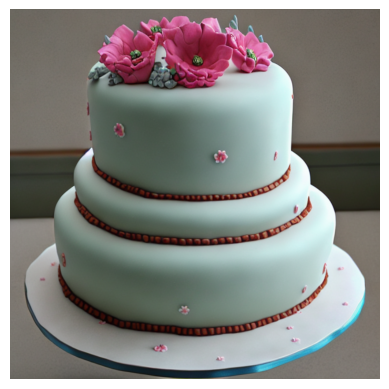

In [11]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [12]:
prompt2 = 'Family is heaven'

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  Family is heaven


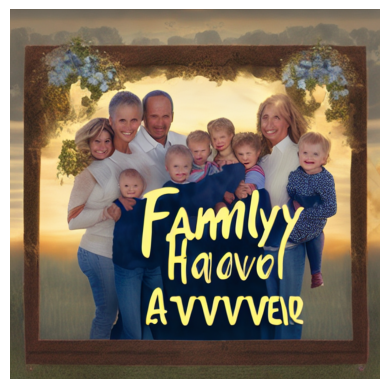

In [13]:
print("[PROMPT]: ",prompt2)
plt.imshow(image);
plt.axis('off');

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

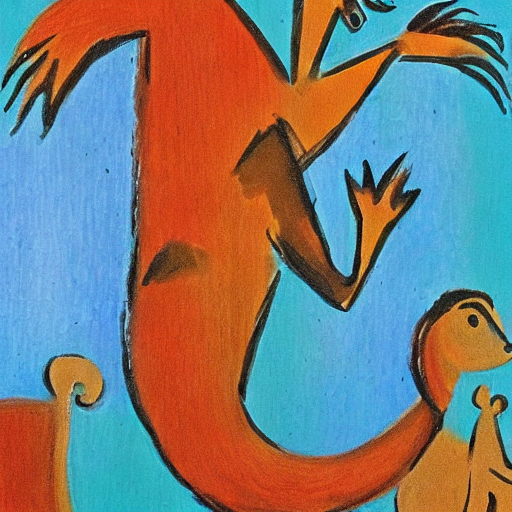

In [14]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipeline.to("cuda")
pipeline("An image of a squirrel in Picasso style").images[0]

#Image Generation App using Streamlit

In [15]:
%%capture
!pip install diffusers transformers accelerate safetensors scipy streamlit torch --upgrade

In [ ]:
%%writefile app.py
import streamlit as st
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

# ---------------------
# Streamlit UI
# ---------------------
st.title("Stable Diffusion Image Generator (Colab)")
st.write("Generate AI art using Dreamlike Diffusion model.")

# Default prompt
prompt = st.text_input("Enter your prompt:", "Mom loves kids and flowers")

generate = st.button("Generate Image")

if generate:
    st.write("Loading model... (only first time)")

    model_id = "dreamlike-art/dreamlike-diffusion-1.0"

    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        use_safetensors=True
    )

    pipe = pipe.to("cuda")

    st.write(f"**[PROMPT]**: {prompt}")

    # Generate image
    with torch.autocast("cuda"):
        image = pipe(prompt).images[0]

    st.image(image, caption="Generated Image", use_column_width=True)


In [ ]:
!pip install streamlit -q
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

!pkill streamlit || echo "No previous Streamlit process"
import time, subprocess

streamlit_proc = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"])
time.sleep(8)

# Create tunnel
!cloudflared tunnel --url http://localhost:8501 --no-autoupdate